# Introduction to  Machine learning with Scikit-Learn

Adapted from [glouppe's tutorial](https://github.com/glouppe/tutorials-scikit-learn/)

## Why Scikit-learn?

* Scikit-learn is the most popular machine learning in Python.
* Simple and efficient algorithm implementations
* Implements a wide variety of well-established machine learning algorithms
* Has extensive <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> 
* Lots of available <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* Project is mature and stable and follows srict development guidelines 
* Builds upon NumPy and SciPy 

## Available algorithms

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors 
* Neural networks (basics)
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and more!_ (See [Reference](http://scikit-learn.org/dev/modules/classes.html))

## API


All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- a `transformer` interface for converting data.

Goal: enforce a simple and consistent API to __make it trivial to swap or plug algorithms__. 

### Estimators

The basic abstraction in sklearn is an estimator. Estimators implement the `fit(X, y=None)` method that fits the model

### Predictors

Predictors use a fitted model to make predictions on data. They implement the `predict(X)` method that returns the predicted `y` values

### Transformers

Transformers change the data to new representations. They implement the `transform(X, y=None)` method that returns the modified data

## Step 0: Classification Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.

The goal of supervised classification is to build an estimator $\varphi: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

where $\ell$ is a loss function, e.g., the zero-one loss for classification $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## Step 1: Data loading and inspection

- Input data => Numpy arrays or Scipy sparse matrices ;
- $X$ => Data samples. Shape  => `n_samples` $\times$ `n_features`
- $y$ => Labels. Shape => `n_samples`

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
import pprint

bc_data = load_breast_cancer()
X, y = bc_data.data, bc_data.target

print("DATA OVERVIEW")
print("------------------------------------------")

print("X shape: (n_samples) {} x (n_features) {}"
      .format(X.shape[0], X.shape[1]))
print("y shape: (n_samples) {}".format(y.shape[0]))

# set converts a list into a set containing the unique elements in the list
print("Unique labels: {}".format(set(y)))
print("Unique labels: {}".format(bc_data.target_names))

print("------------------------------------------")

print("Features:")
pprint.pprint(bc_data.feature_names)

DATA OVERVIEW
------------------------------------------
X shape: (n_samples) 569 x (n_features) 30
y shape: (n_samples) 569
Unique labels: {0, 1}
Unique labels: ['malignant' 'benign']
------------------------------------------
Features:
array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')


A nice way to gather intuition about the data is to plot the features against each other.

This shows how good we can separate the classes based on the features

First let's define some plotting utilities

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_features(X, feature_idx, feature_names, labels):
    fig, ax = plt.subplots()
    zeros = ax.scatter(
        X[y == 0, feature_idx[0]],
        X[y == 0, feature_idx[1]], 
        label=labels[0], c='orange', alpha=0.3, s=100)
    ones = ax.scatter(
        X[y == 1, feature_idx[0]], 
        X[y == 1, feature_idx[1]], 
        label=labels[1], c='b', alpha=0.3, s=100)
    plt.title("{} vs {}".format(feature_names[0], feature_names[1]))
    ax.legend()
    ax.grid(True)
    plt.show()

And plot the features.

__Question__: Observe the following plots.

1. What conclusion can you draw from the first plot about the relation between mean radius and perimeter?
2. If you were to select only 2 features for classification, which of the following pairs would you prefer?

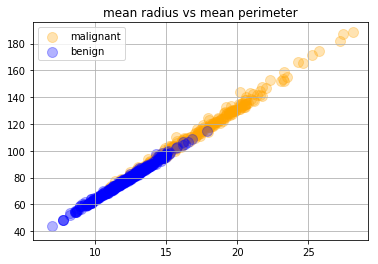

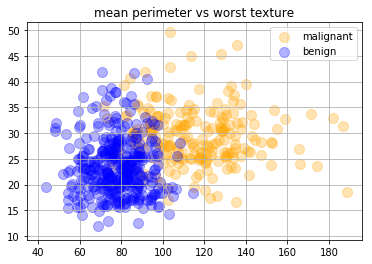

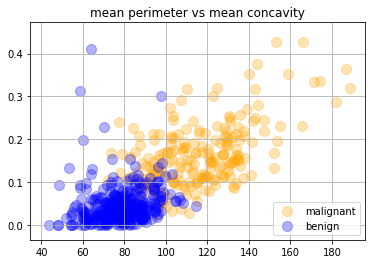

In [3]:
plot_features(
    X, [0, 2],
    [bc_data.feature_names[0], bc_data.feature_names[2]],
    bc_data.target_names)
plot_features(
    X, [2, 21],
    [bc_data.feature_names[2], bc_data.feature_names[21]],
    bc_data.target_names)
plot_features(
    X, [2, 6],
    [bc_data.feature_names[2], bc_data.feature_names[6]],
    bc_data.target_names)

## Step 2: Data preprocessing

We can use Transformers to process our data before classifying them to obtain more convenient representations.

A common preprossecing step Z-normalization, where we normalize data to have zero mean and unit std using the transformation


$$
x_{new} = \frac{x_{old} - \mu}{\sigma}
$$

We can implement Z-normalization as follows:

__Question__: Compare the scaled features plot with the original. What do you observe?

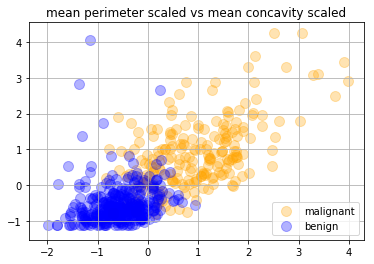

In [4]:
import numpy as np

def znorm(x, axis=0):
    return (x - x.mean(axis=axis)) / x.std(axis=axis)

X_scaled_custom = znorm(X)

plot_features(
    X_scaled_custom, [2, 6],
    ["{} scaled".format(bc_data.feature_names[2]),
     "{} scaled".format(bc_data.feature_names[6])],
    bc_data.target_names)


This is already implemented as a Transformer in sklearn under the name of `StandardScaler`.
From now on we will use the Transformer version, as it can be  combined seamlessly with other sklearn utilities

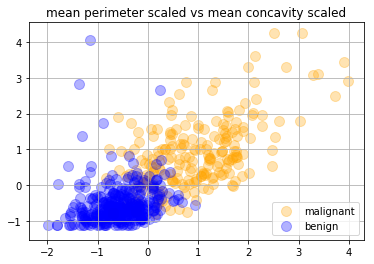

In [5]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

plot_features(
    X_scaled, [2, 6],
    ["{} scaled".format(bc_data.feature_names[2]),
     "{} scaled".format(bc_data.feature_names[6])],
    bc_data.target_names)

And we can verify `znorm` has the same result as the `StandardScaler`

In [6]:
# isclose can be used for floating point comparison
print(np.all(np.isclose(X_scaled, X_scaled_custom, rtol=1e-6)))

True


From now on we will use only the mean perimeter and mean concavity as features

In [7]:
X_new = X_scaled[:, [2, 6]]

print(X_new.shape)

(569, 2)


In [8]:
X_new.shape

(569, 2)

## Step 3: Fitting the model

First we define some utilities to visualize the classifier's __decision function__.

This shows us where the classifier decides to separate the data into the different classes.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_clf(clf, X, y, labels):
    fig, ax = plt.subplots()
    # title for the plots
    title = ('Decision surface of Classifier')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    zeros = ax.scatter(
        X0[y == 0], X1[y == 0],
        c='blue', label=labels[0],
        s=60, alpha=0.9, edgecolors='k')
    ones = ax.scatter(
        X0[y == 1], X1[y == 1],
        c='red', label=labels[1], 
        s=60, alpha=0.9, edgecolors='k')
    
    ax.set_ylabel(labels[1])
    ax.set_xlabel(labels[0])
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

Now it's time to perform the classification.

We can fit a Naive Bayes model to classify the data in the 2 classes. Naive Bayes comes already implemented in sklearn in the `GaussianNB` class. `GaussianNB` assumes the data are normally distributed and implements the Estimator / Predictor interfaces.

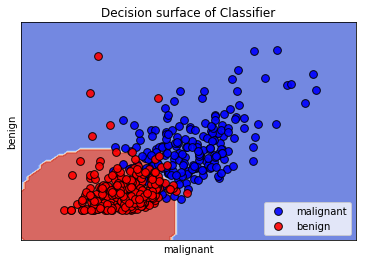

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

We can make predictions as follows

In [11]:
y_pred = clf.predict(X_new[17:27])

y_true = y[17:27]

print("Naive Bayes - Predicted labels:\t {}".format(y_pred))
print("True labels:\t\t\t {}".format(y_true))

Naive Bayes - Predicted labels:	 [0 0 1 1 1 0 0 0 0 0]
True labels:			 [0 0 1 1 1 0 0 0 0 0]


We can also fit a Gaussian Mixture Model (GMM) classifier with a diagonal covariance matrix. This can be done using the `GaussianMixture` classifier.

`GaussianMixture` implements the Estimator / Predictor interfaces.

__Question__: Try changing `n_init=1` in the following code snippets. Run the cell a few times. What do you observe? Why?

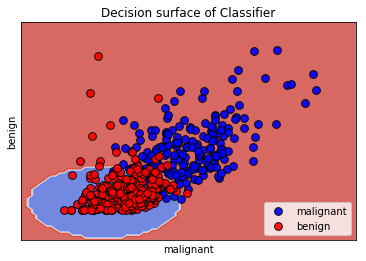

In [12]:
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2, covariance_type='diag', n_init=100)
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

Or with a full covariance matrix

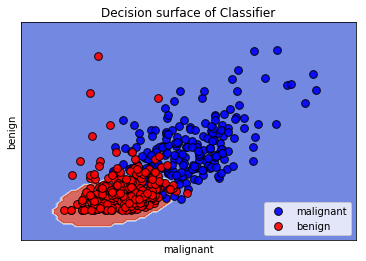

In [13]:
from sklearn.mixture import GaussianMixture
clf = GaussianMixture(n_components=2, covariance_type='full', n_init=100)
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

We can also fit a Logistic Regression (LR) model. LR tries to model the decision boundary as an hyperplane.

LR implements the Estimator / Predictor interfaces.

LR is a __linear classifier__, meaning it separates data by drawing a hyperplane between the two classes.
Observe how LR tries to separate data by drawing a line

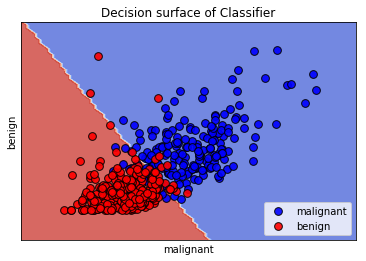

In [14]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

Support Vector Machines (SVM) try to find the hyperplane which has the largest distance to the nearest training points of any class. In sklearn SVMs are implemented in the `SVC` class.

Again `SVC` implements the Estimator / Predictor interface

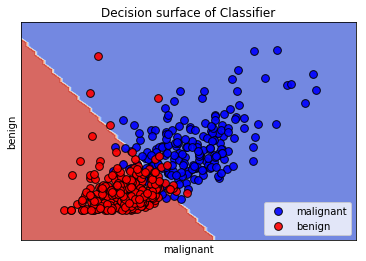

In [15]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")  # try kernel="rbf" instead
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

LR and SVM both try to separate data by drawing a line / hyperplane. Such classifiers are called `linear classifiers`.

We can modify SVM to first project the data using a `kernel`. You will learn about this during the semester.

The important thing here is that with kernels we can get non-linear decision boundaries

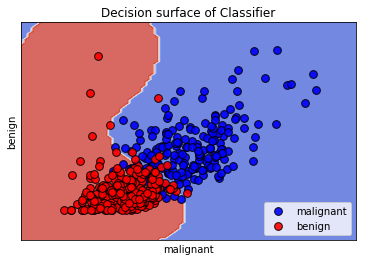

In [16]:
clf = SVC(kernel="rbf")  # try kernel="rbf" instead
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

Another way to obtain a non-linear classifier is to use multilayer neural networks. In sklearn neural networks are implemented in the `MLPClassifier` class.

__Question__: Which interfaces does `MLPClassifier` implement?

Let's fit:
- A small NN (2 layers with 50 neurons each)
- A medium NN (3 layers with 100 neurons each)
- A large NN (4 layers 1000 neurons each)

__Question__: Observe the decision boundaries. Which architecture would you choose?

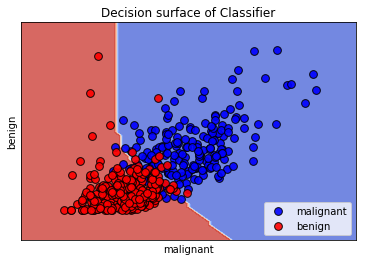

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50, 50),
                    activation='relu',
                    solver='adam',
                    learning_rate='invscaling')
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

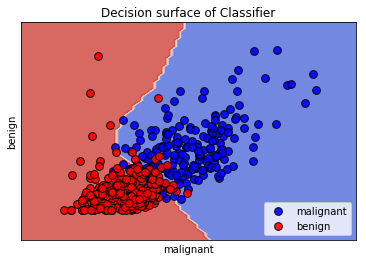

In [18]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                    activation='relu',
                    solver='adam',
                    learning_rate='invscaling')
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

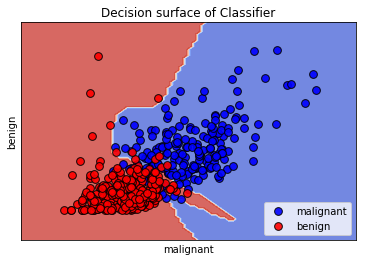

In [19]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000, 1000),
                    activation='relu',
                    solver='adam',
                    learning_rate='invscaling')
clf.fit(X_new, y)
plot_clf(clf, X_new, y, bc_data.target_names)

## Step 4: Model evaluation

We need some metrics to compare which model performs best. Here we will examine

- The error on the training data
- The error on the test data

__Question__: What does `performs best` mean for a classifier? Given this which of the previous metrics is more reliable?

### Error on training data 

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss
clf = LogisticRegression()
clf.fit(X_new, y)
print("Training error =", zero_one_loss(y, clf.predict(X_new)))

Training error = 0.09314586994727592


### Error on test data

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

__The model should never see samples from the test dataset during training__

Training error = 0.08685446009389675
Test error = 0.1048951048951049


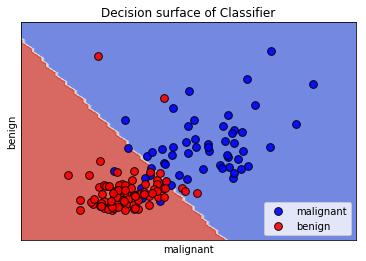

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=2)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

plot_clf(clf, X_test, y_test, bc_data.target_names)

Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

__Question__: Try changing `random_state` in the `train_test_split` arguments. What do you observe? Why?

### Cross-validation

Issue: 
- When ${\cal L}$ is small, training on 70% of the data may lead to a model that is significantly different from a model that would have been learned on the entire set ${\cal L}$. 
- Yet, increasing the size of the training set (resp. decreasing the size of the test set), might lead to an inaccurate estimate of the generalization error. 

Solution: K-Fold cross-validation. 
- Split ${\cal L}$ into K small disjoint folds. 
- Train on K-1 folds, evaluate the test error one the held-out fold.
- Repeat for all combinations and average the K estimates of the generalization error.

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X_new, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.089567 +-0.047459


__Question__: Try changing the `random_state` in the above example and observe the CV error. What do you observe? Can we be confident about the CV error estimate?


### Metrics

__Accuracy score__

When evaluating the models we want to report some standard metrics.

The simplest metric for classification is the __accuracy score__, which is the default metric in most models.

The accuracy score is simply the percentage of the correct predictions.

In [23]:
print("Accuracy score is classifiers default score. clf.score: {}"
      .format(clf.score(X_test, y_test)))

Accuracy score is classifiers default score. clf.score: 0.8951048951048951


In [24]:
def acc(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_true.shape[0]

print("We can implement it very easily. acc: {}"
      .format(acc(y_test, clf.predict(X_test))))

We can implement it very easily. acc: 0.8951048951048951


In [25]:
from sklearn.metrics import accuracy_score
print("But it's already implemented in sklearn. accuracy_score: {}"
      .format(accuracy_score(y_test, clf.predict(X_test))))

But it's already implemented in sklearn. accuracy_score: 0.8951048951048951


__Precision, recall and F1 score__

In many cases accuracy is simply not enough to evaluate a classifier. Instead we may need to know how many samples get incorrectly classified as positive (the False Positives $FP$) and how many get classified incorrectly as negative (the False Negatives $FN$).

For example in the malignant vs benign breast cancer we are studying, the consequences are far larger if we missclassify a malignant tumor as benign than if we missclassify a benign tumor as malignant.

Here we study the following metrics:

- __precision__ $P$: the fraction of relevant instances among the retrieved instances
- __recall__ $R$: the fraction of relevant instances that have been retrieved over the total amount of relevant instances
- __F1__: The harmonic mean of $P$ and $R$


$$P = \frac{TP}{TP + FP}$$


$$R = \frac{TP}{TP + FN}$$

$$F1 = \frac{2 P R}{P + R}$$

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F1 =", f1_score(y_test, clf.predict(X_test)))

Precision = 0.9090909090909091
Recall = 0.9195402298850575
F1 = 0.9142857142857144


#### Confusion matrix

An even more fine grained metric is the confusion matrix, which shows the number of samples that get missclassified in each class.

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).[2] The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

print(cm)

[[48  8]
 [ 7 80]]


We can also plot the confusion matrix as a heatmap

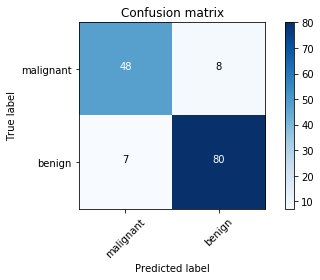

In [28]:
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

cm = confusion_matrix(y_test, clf.predict(X_test))

plot_confusion_matrix(cm, bc_data.target_names)

__Question__: How many malignant tumors did we misdiagnose as benign?

## Step 5: Model Selection

While there are many points to be covered for model selection, in this tutorial we will consider the following:

1. Hyperparameter search
2. Validation curves
3. Learning curves

### Hyperparameter search

Hyperparameter search is the problem of finding the best parameters for the model to fit the best performing model.

The simplest solution is to create a grid of all possible parameters and evaluate the model with each set of parameters in the grid, i.e. to perform a grid search.

In [29]:
import itertools
import numpy as np
from sklearn.model_selection import cross_val_score


def grid_search(clf, param_grid, X, y, cv=5, scoring="f1"):
    parameters = sorted(param_grid)
    combinations = itertools.product(*(param_grid[p] for p in parameters))
    best_score = -np.Inf
    best_params = {}
    for param_set in combinations:
        kwargs = dict(zip(parameters, param_set))
        clf.set_params(**kwargs)
        scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_params = param_set
    return best_score, dict(zip(parameters, best_params))

__Question__: Does `grid_search` work for every classifier in sklearn? Why? 

In [30]:
best_score, best_params = grid_search(
    LogisticRegression(),
    {"C": np.linspace(0.05, 5, 50), "penalty": ["l1", "l2"]},
    X_new, y,
    scoring="f1",
    cv=5)

print("Best score = {}, Best parameters = {}".format(best_score, 
                                                     best_params))

Best score = 0.9365934850906467, Best parameters = {'C': 0.05, 'penalty': 'l2'}


__Question__: Should you report the best score as an estimate of the generalization error of the model?

Sklearn implements grid search in `GridSearchCV` class as an Estimator. One obvious improvement is that it has parallelization support.

In [31]:
from sklearn.model_selection import GridSearchCV

# Note in param_grid we pass the names of the parameters we want to search
# as they appear in the classifier's class arguments and the possible values
# they can take
grid = GridSearchCV(LogisticRegression(),
                    param_grid={"C": np.linspace(0.05, 5, 50),
                                "penalty": ["l1", "l2"]},
                    scoring="f1",
                    cv=5, n_jobs=-1)

grid.fit(X_new, y)

print("Best score = {}, Best parameters = {}".format(grid.best_score_, 
                                                     grid.best_params_))

best_params = grid.best_params_

Best score = 0.9365050622524285, Best parameters = {'C': 0.05, 'penalty': 'l2'}


- `grid.best_score_` is not independent from the best model, since its construction was guided by the optimization of this quantity. 

- As a result, the optimized `grid.best_score_` estimate _may_ in fact be a biased, optimistic, estimate of the true performance of the model. 


dd

__Solution__: Use __nested__ cross-validation for correctly selecting the model __and__ correctly evaluating its performance (or use a validation set if you have a lot of data)

In [32]:
grid = GridSearchCV(LogisticRegression(),
                    param_grid={"C": np.linspace(0.05, 5, 50), 
                                "penalty": ["l1", "l2"]},
                    scoring="f1",
                    cv=5, n_jobs=-1)

scores = cross_val_score(grid, X_new, y, cv=5, scoring="f1")

# Unbiased estimate of the accuracy
print("{} +-{}".format(np.mean(scores), np.std(scores)))

0.9365934850906467 +-0.0194485540036999


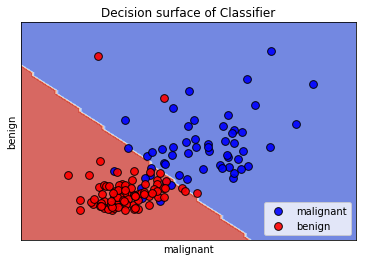

In [33]:
clf = LogisticRegression(**best_params).fit(X_train, y_train)
plot_clf(clf, X_test, y_test, bc_data.target_names)

### Validation Curves

Another important visualization is the __validation curve__. This plot shows how a metric changes with respect to a model parameter

In [34]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(LogisticRegression(), X_new, y, "C",
                                             np.linspace(0.001, 5, 100),
                                             scoring='f1',
                                             cv=5)

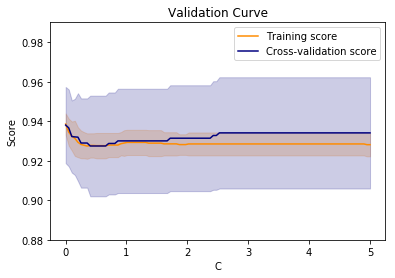

In [35]:

def plot_validation_curve(train_scores, test_scores, param_name, param_values, ylim=(0, 1)):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(ylim[0], ylim[1])
    lw = 2
    plt.plot(param_values, train_scores_mean, label="Training score",
             color="darkorange")
    plt.fill_between(param_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    plt.plot(param_values, test_scores_mean, label="Cross-validation score",
             color="navy")
    plt.fill_between(param_values, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")
    plt.legend(loc="best")
    plt.show()
    
plot_validation_curve(train_scores, test_scores, "C", np.linspace(0.001, 5, 100), ylim=[.88, .99])

### Learning Curves

Learning curves plot the test score and the training score as we vary the available training data.

Learning curves are a very useful tool to interpret a model's behavior, if you know how to read them. 

[Here's a nice article](https://www.dataquest.io/blog/learning-curves-machine-learning/) describing all the tricks

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(), X_new, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 5))

<module 'matplotlib.pyplot' from '/home/george/miniconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

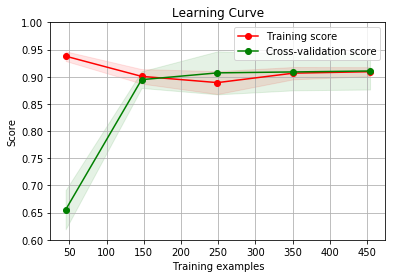

In [37]:
def plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(0, 1)):
    plt.figure()
    plt.title("Learning Curve")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))

__Question__: Is adding more data to the model going to improve performance?

## Putting it all together: Pipelines

Sklearn introduces the concept of pipelines. Pipelines not only make the code short and easy to understand, but also make it easy to ensure that everything runs on the correct set of data.

For example in the above code we have a serious bug. When we preprocessed data with StandardScaler, we used the entire dataset to fit them, not the training dataset.

__Incorrect preprocessing is another way to introduce bias to the models__

or better

__Incorrect preprocessing is the most common way to introduce bias to the models__

or even better

__Incorrect preprocessing is the hardest to spot source of bias for the models__


A correct pipeline should look like this

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer


bc_data = load_breast_cancer()
X, y = bc_data.data, bc_data.target


clf_pipeline = Pipeline(steps=[
    ('znorm', StandardScaler()),
    ('lr', LogisticRegression())
])

param_grid = {
    'lr__C': np.linspace(0.01, 1, 30),
    'lr__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(
    clf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

best_params = grid_search.fit(X, y).best_params_

best_scores = cross_val_score(grid_search,
                              X, y, 
                              cv=5, 
                              scoring="f1")
import pprint
print("Best model params:")
pprint.pprint(best_params)
print("Best score: {}+-{}".format(np.mean(best_scores), 
                                  np.std(best_scores)))

# train_sizes, train_scores, test_scores = learning_curve(
#     grid_search, X, y, cv=5, n_jobs=-1, 
#     train_sizes=np.linspace(.1, 1.0, 5))

# plot_learning_curve(train_scores, test_scores, train_sizes, ylim=(.6, 1))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.1s finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.1s finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.0s finished


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished


Best model params:
{'lr__C': 0.11241379310344828, 'lr__penalty': 'l2'}
Best score: 0.9860904745049309+-0.004393154703270957


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.3s finished
